 K Means clustering 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [4]:
df=pd.read_excel("Online Retail.xlsx")

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
# Data Cleaning
df = df.dropna(subset=["CustomerID"])  # Remove missing CustomerID
df = df[df["Quantity"] > 0]  # Remove negative quantities
df = df[df["UnitPrice"] > 0]  # Remove negative prices

In [8]:
# Feature Engineering
df["TotalSpent"] = df["Quantity"] * df["UnitPrice"]
customer_data = df.groupby("CustomerID").agg(
    TotalSpent=("TotalSpent", "sum"),
    TotalQuantity=("Quantity", "sum"),
    UniqueProducts=("StockCode", "nunique")
).reset_index()

In [9]:
from sklearn.preprocessing import StandardScaler
# Data Normalization
scaler=StandardScaler()
X_scaled = scaler.fit_transform(customer_data[["TotalSpent", "TotalQuantity", "UniqueProducts"]])

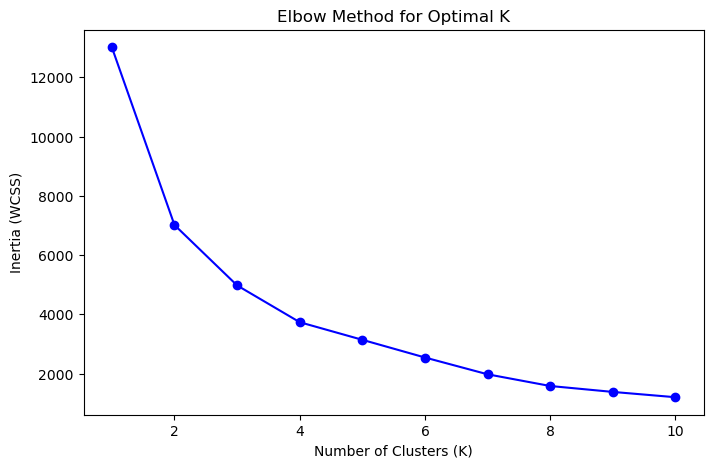

In [10]:
# Elbow Method for Optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [11]:
# Apply K-Means Clustering
optimal_k = 4  # Elbow method suggests K=4
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
customer_data["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)



In [12]:
print("K-Means Clustering Results:")
print(customer_data["Cluster_KMeans"].value_counts())

K-Means Clustering Results:
Cluster_KMeans
0    3705
2     615
3      14
1       4
Name: count, dtype: int64


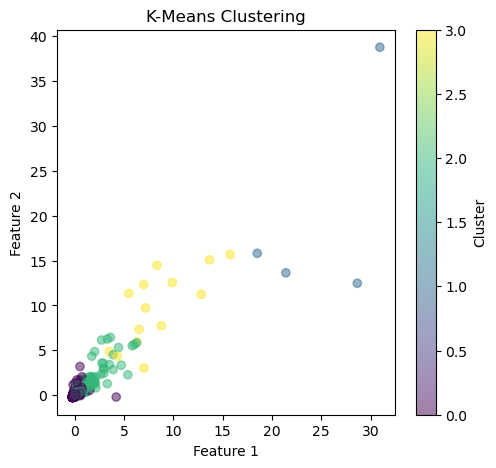

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=customer_data["Cluster_KMeans"], cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()
